<a href="https://colab.research.google.com/github/Nirrax/zed_lab/blob/main/zed_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import danych

In [11]:
import pandas as pd
# Załaduj dane
df = pd.read_csv("Dane_energia.csv", sep=';', encoding='cp1250')
df['energia'] = df['energia'].str.replace(',','.').astype(float)
df.head()

,mies,dzien_mies,dzien_tyg,godzina,energia,temp_dobowa
0,Listopad,1,Piątek,1,305.058,5
1,Listopad,1,Piątek,2,285.228,5
2,Listopad,1,Piątek,3,275.947,5
3,Listopad,1,Piątek,4,277.628,5
4,Listopad,1,Piątek,5,275.699,5


# Sprawdzenie założeń testi ANOVA

Normalność rozkładu (p > 0.05)

In [12]:
from scipy.stats import shapiro

normality_results = df.groupby('dzien_tyg')['energia'].apply(lambda x: shapiro(x)[1])
print(normality_results)

dzien_tyg
Czwartek        2.477974e-03
Niedziela       2.332238e-02
Piątek          4.491676e-05
Poniedziałek    5.735684e-07
Sobota          5.231141e-03
Wtorek          8.302108e-02
Środa           1.057724e-03
Name: energia, dtype: float64


Homogeniczność wariancji (p > 0.05)

In [13]:
from scipy.stats import levene

groups = [group["energia"].values for name, group in df.groupby("dzien_tyg")]
stat, p = levene(*groups)
print(f"Levene test p-value: {p}")

Levene test p-value: 1.6422179787738592e-12


Test ANOVA

In [14]:
from scipy.stats import f_oneway

stat, p = f_oneway(*groups)
print(f"ANOVA p-value: {p}")

ANOVA p-value: 4.18622923629521e-56


Test Kruskalla-Wallisa

In [15]:
from scipy.stats import kruskal

stat, p = kruskal(*groups)
print(f"Kruskal-Wallis p-value: {p}")

Kruskal-Wallis p-value: 2.6475889538966085e-52


Średnie zużycie energii

In [16]:
means = df.groupby("dzien_tyg")["energia"].mean().sort_values(ascending=False)
print(means)

dzien_tyg
Czwartek        377.968077
Wtorek          374.430359
Piątek          373.342735
Środa           372.920244
Poniedziałek    361.615045
Sobota          358.380519
Niedziela       325.472897
Name: energia, dtype: float64


<ipython-input-17-ba114e18bcf0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='dzien_tyg', y='energia', palette='Set2')


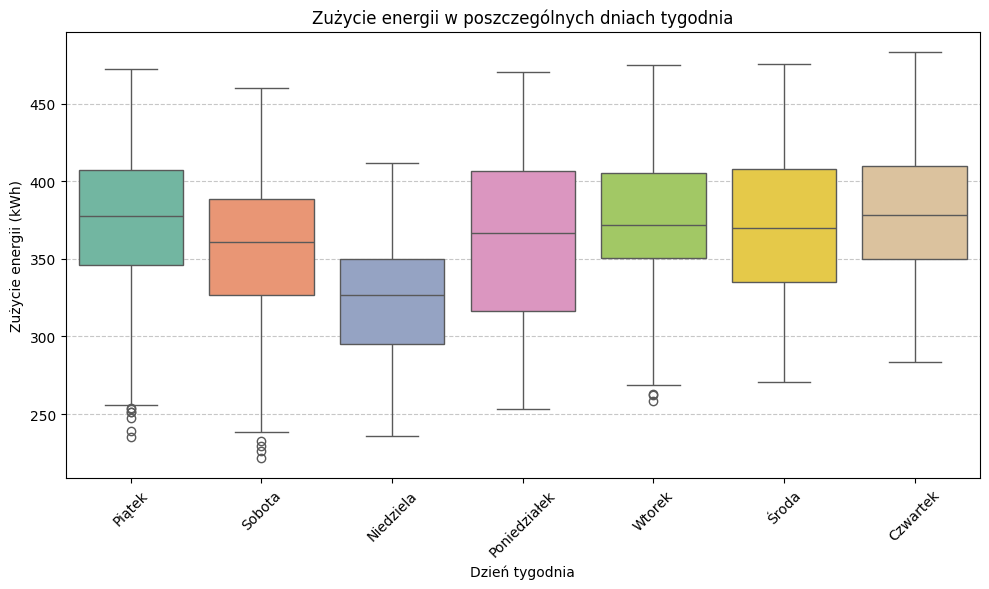

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='dzien_tyg', y='energia', palette='Set2')
plt.title('Zużycie energii w poszczególnych dniach tygodnia')
plt.ylabel('Zużycie energii (kWh)')
plt.xlabel('Dzień tygodnia')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()